# Calculating Lagrangian trajectories for uncoupled simulation

## Loading modules

In [1]:
%matplotlib inline
from parcels import (FieldSet, ParticleSet,
                     JITParticle, ScipyParticle,
                     AdvectionRK4)
from glob import glob
import xarray as xr
import numpy as np
from datetime import timedelta, datetime

## Create fieldset

In [2]:
datapath = '/Users/siren/Data/IMMERSE/'
filepaths_u = sorted(glob(datapath + 'surface_TKE_v42RC/MED24_OBC_1d*_grid_U.nc'))
filepaths_v = sorted(glob(datapath + 'surface_TKE_v42RC/MED24_OBC_1d*_grid_V.nc'))
gridpath = (datapath + 'domain/fgrid.nc')

In [3]:
filenames = {'U': {'lon': gridpath, 'lat': gridpath, 'data': filepaths_u},
             'V': {'lon': gridpath, 'lat': gridpath, 'data': filepaths_v}}
variables = {'U': 'vozocrtx',
             'V': 'vomecrty'}
dimensions = {'U': {'lon': 'glamf', 'lat': 'gphif', 'time': 'time_counter'},
              'V': {'lon': 'glamf', 'lat': 'gphif', 'time': 'time_counter'}}

In [4]:
fieldset = FieldSet.from_nemo(filenames, variables, dimensions,
                              allow_time_extrapolation=False,
                              time_periodic=False,
                              mesh='spherical')

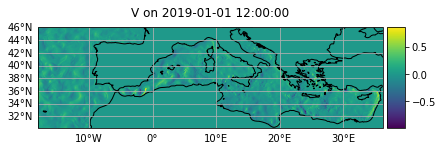

In [5]:
fieldset.V.show()

## Build and execute particle set

### Create starting positions

In [6]:
#release = fieldset.U.data
#release[release != 0] = 1
#releasefield_xr = xr.DataArray(data=release)
#releasefield_xr.sum()

In [7]:
lonmin = 3.5
lonmax = 4.5
latmin = 42
latmax = 43
step = 1/6
lons, lats = np.meshgrid(np.arange(lonmin, lonmax+step, step), np.arange(latmin, latmax+step, step))

In [8]:
nparticles=lons.shape[0]*lons.shape[1]
nparticles

56

In [9]:
pset = ParticleSet(fieldset=fieldset,
                   pclass=ScipyParticle,
                   lon=lons, lat=lats)
pset.populate_indices()

/Users/siren/opt/miniconda3/envs/py3_parcels/lib/python3.10/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


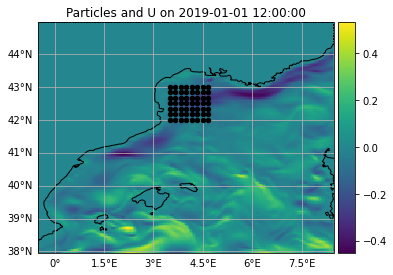

In [10]:
plotstep=4
pset.show(field=fieldset.U,
          domain={'N':(latmax+plotstep/2),'S':(latmin-plotstep),
                  'E': (lonmax+plotstep), 'W':(lonmin-plotstep)})

### Calculate trajectories

In [11]:
outfile = pset.ParticleFile('/Users/siren/IMMERSE_waves/develop-mac/data/Traj-uncoupled.nc', 
                            outputdt=timedelta(days=1))
kernels = pset.Kernel(AdvectionRK4)
pset.execute(kernels,
             runtime=timedelta(days=10), dt=timedelta(hours=6),
             output_file=outfile)
outfile.export()
#outfile.close()

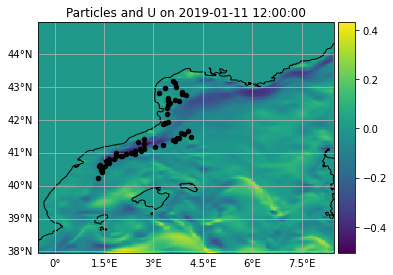

In [12]:
plotstep=4
pset.show(field=fieldset.U,
          domain={'N':(latmax+plotstep/2),'S':(latmin-plotstep),
                 'E': (lonmax+plotstep), 'W':(lonmin-plotstep)})